# Lesson 7 - Method of Images

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
N = 200
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

## Source Near a Plane Wall

In [10]:
class Source:
    """
    Contains information related to a source (or sink).
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the singularity.

        """
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by the singularity.
        
        """
        u = (self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v
    
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by the singularity.

        """
        psi = (self.strength / (2 * math.pi) *
               np.arctan2((Y - self.y), (X - self.x)))
        return psi
    
    def potential(self, X, Y):
        phi = (self.strength / (2 * math.pi) *
               np.log((X - self.x)**2 + (Y - self.y)**2))
        return phi

In [11]:
strength_source = 1.0                  # strength of the source         
x_source, y_source = 0.0, 0.5          # location of the source

# create a source (object of class Source) 
source = Source(strength_source, x_source, y_source)

# compute the velocity field and the stream-function on the mesh grid
u1, v1 = source.velocity(X, Y)
psi1 = source.stream_function(X, Y)
phi1 = source.potential(X, Y)

In [12]:
# create the image of the source and computes velocity and stream-function
source_image = Source(strength_source, x_source, -y_source)
u2, v2 = source_image.velocity(X, Y)
psi2 = source_image.stream_function(X, Y)
phi2 = source_image.potential(X, Y)

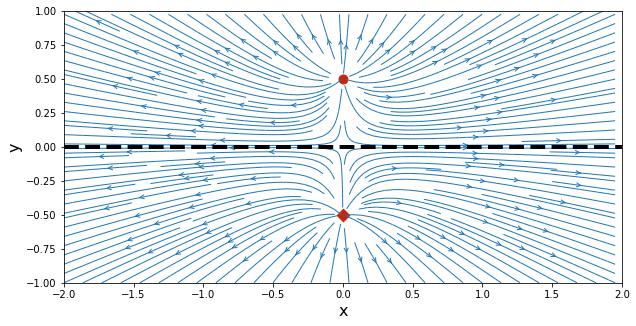

In [13]:
# superposition of the source and its image
u = u1 + u2
v = v1 + v2
psi = psi1 + psi2
phi = phi1 + phi2

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
plt.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

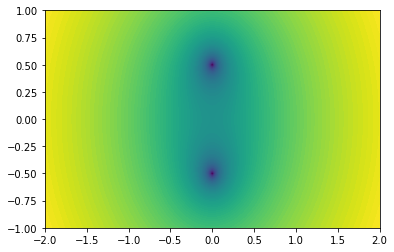

In [16]:
plt.contourf(X, Y, phi, levels=100)

## Vortex Near a Plane Wall

In [19]:
class Vortex:
    """
    Contains information related to a vortex.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the vortex.

        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a vortex.

        """
        u = (+self.strength / (2 * math.pi) *
             (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        v = (-self.strength / (2 * math.pi) *
             (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        return u, v
        
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a vortex.

        """
        psi = (-self.strength / (4 * math.pi) *
               np.log((X - self.x)**2 + (Y - self.y)**2))
        return psi

In [20]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5          # location of the vortex

# create a vortex and computes velocity and stream-function
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
u1, v1 = vortex.velocity(X, Y)
psi1 = vortex.stream_function(X, Y)

# create the image of the vortex and computes velocity and stream-function
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
u2, v2 = vortex_image.velocity(X, Y)
psi2 = vortex_image.stream_function(X, Y)

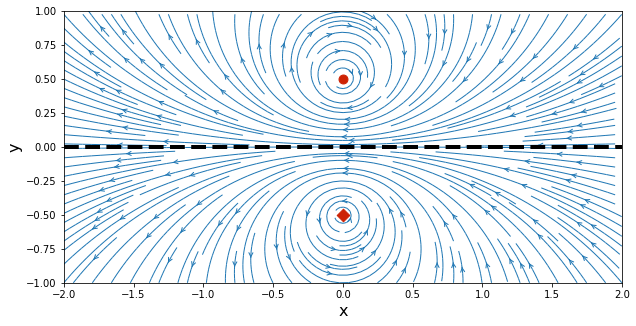

In [22]:
# superposition of the vortex and its image
u = u1 + u2
v = v1 + v2
psi = psi1 + psi2

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
plt.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

In [23]:
strength_vortex = 1.0                  # absolute value of each vortex strength
x_vortex1, y_vortex1 = -0.1, 0.5       # location of the first vortex
x_vortex2, y_vortex2 = +0.1, 0.5       # location of the second vortex

# create two vortices at different locations
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

# compute the velocity and stream-function for each vortex
u1, v1 = vortex1.velocity(X, Y)
psi1 = vortex1.stream_function(X, Y)
u2, v2 = vortex2.velocity(X, Y)
psi2 = vortex2.stream_function(X, Y)

# create an image for each vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

# compute the velcoity and stream-function of each image
u3, v3 = vortex1_image.velocity(X, Y)
psi3 = vortex1_image.stream_function(X, Y)
u4, v4 = vortex2_image.velocity(X, Y)
psi4 = vortex2_image.stream_function(X, Y)

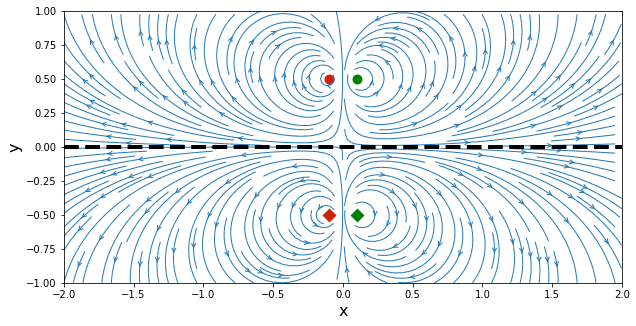

In [26]:
# superposition of the vortex pair and its image
u = u1 + u2 + u3 + u4
v = v1 + v2 + v3 + v4
psi = psi1 + psi2 + psi3 + psi4

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
plt.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
plt.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
plt.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
plt.axhline(0.0, color='k', linestyle='--', linewidth=4);

## Doublet near a plane wall parallel to a uniform flow

In [28]:
u_inf = 1.0    # free-stream speed

# calculate the velocity and stream-function of the free-stream flow
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [29]:
class Doublet:
    """
    Contains information related to a doublet.
    """
    def __init__(self, strength, x, y):
        """
        Sets the location and strength of the doublet.

        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """
        Computes the velocity field generated by a doublet.

        """
        u = (-self.strength / (2 * math.pi) *
             ((X - self.x)**2 - (Y - self.y)**2) /
             ((X - self.x)**2 + (Y - self.y)**2)**2)
        v = (-self.strength / (2 * math.pi) *
             2 * (X - self.x) * (Y - self.y) /
             ((X - self.x)**2 + (Y - self.y)**2)**2)
        return u, v
            
    def stream_function(self, X, Y):
        """
        Computes the stream-function generated by a doublet.

        """
        psi = (-self.strength / (2 * math.pi) *
               (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
        return psi

In [30]:
strength_doublet = 1.0                # strength of the doublet
x_doublet, y_doublet = 0.0, 0.3       # location of the doublet

# create a doublet (object of class Doublet)
doublet = Doublet(strength_doublet, x_doublet, y_doublet)

# compute the velocity and stream-function of the doublet on the mesh
u1, v1 = doublet.velocity(X, Y)
psi1 = doublet.stream_function(X, Y)

# create the image of the doublet
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)

# compute the velocity and stream-function of the image on the mesh
u2, v2 = doublet_image.velocity(X, Y)
psi2 = doublet_image.stream_function(X, Y)

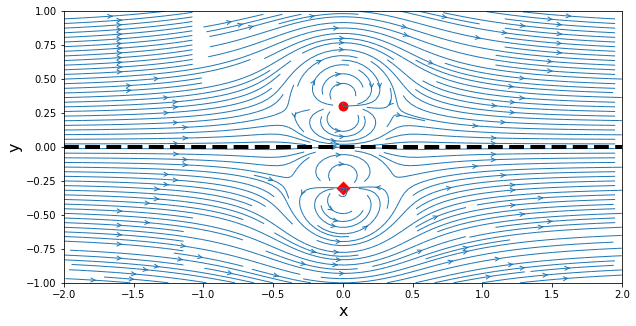

In [32]:
# superposition of the doublet and its image to the uniform flow
u = u_freestream + u1 + u2
v = v_freestream + v1 + v2
psi = psi_freestream + psi1 + psi2

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
plt.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);